In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# The example below uses only the first feature of the diabetes dataset, in order to illustrate the
# data points within the two-dimensional plot. The straight line can be seen in the plot, showing how 
# linear regression attempts to draw a straight line that will best minimize the residual sum of 
# squares between the observed responses in the dataset, and the responses predicted by the linear 
# approximation.

# The coefficients, residual sum of squares and the coefficient of determination are also calculated.

# The diabetes data has already been normalized (i.e. mean centered and scaled by the standard deviation).

In [3]:
data = datasets.load_diabetes(return_X_y=False, as_frame=True)
# data is an object with attributes data, target, feature_names, frame, DESCR, ...

In [4]:
# Show the data
data.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
# Show the target
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [6]:
# From the description we see that:
# s1: tc, total serum cholesterol
# s2: ldl, low density lipoproteins
# s3: hdl, high density lipoprotei
# s4: tch, total cholesterol
# s5: ltg, possibly log of serum triglycerides level
# s6: glu, blood sugar level

In [7]:
# Rename the feature names for s1 through s6 to provide more clarity
data.frame.rename(columns={"s1": "tc", "s2": "ldl", "s3": "hdl", "s4": "tch", "s5":"ltg", "s6":"glu"}, errors="raise", inplace=True)

In [8]:
data.frame.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


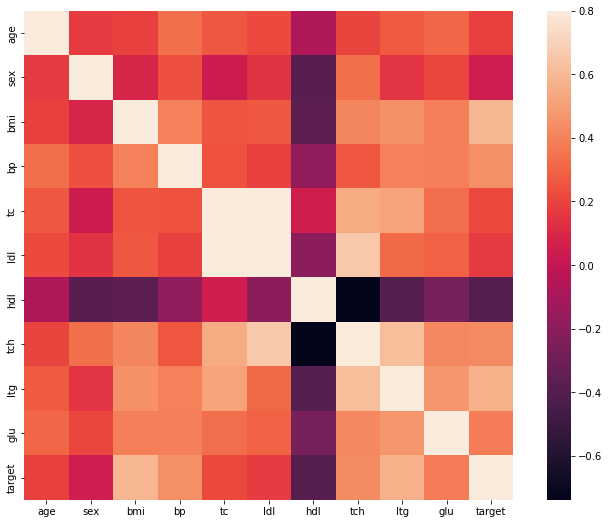

In [9]:
import seaborn as sns
corrmat = data.frame.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax = 0.8, square=True);

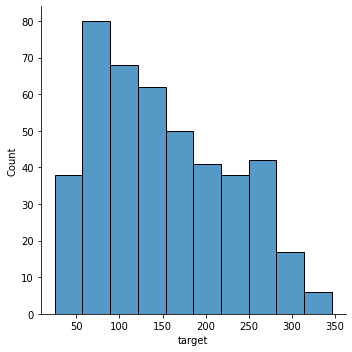

In [10]:
sns.displot(data.frame['target'])

In [11]:
y = data.frame.target
X = (data.frame).drop(['target'], axis=1)

In [12]:
# Define the training and test data
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [14]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [15]:
# The coefficients
print("Coefficients: \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
Mean squared error: 2900.17
Coefficient of determination: 0.45


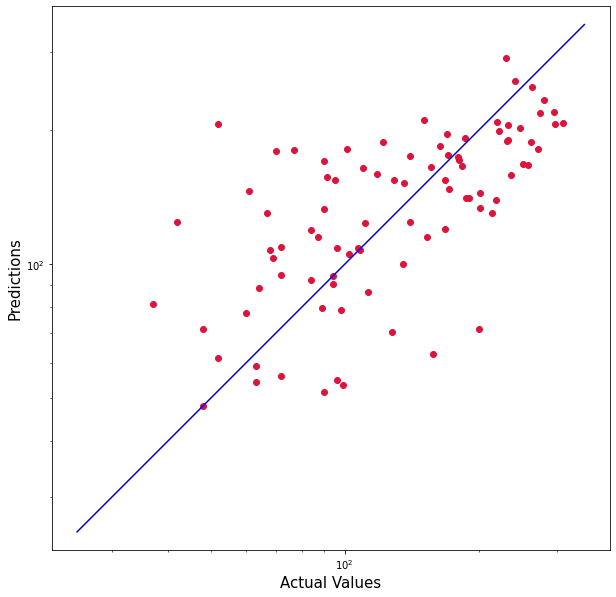

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_train))
p2 = min(min(y_pred), min(y_train))
plt.plot([p1, p2], [p1, p2], color="blue")
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.axis('equal')
plt.show()

In [20]:
# References
# Diabetes data set: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html